## Problem

We are going to create a web application to predict weather a user will purchase a product or not. For that the first step is building a machine learning model trained on historical dataset. This model will act as the backend of the application. This model will be wrapped in a flask application, which also provide the front-end for accepting user input and displaying user output. 

Let's start with modelling. We are following the datascience lifecycle process for this. The steps we are going to do are:

1. Understanding the problem.
2. Loading and prepairing the data
3. EDA
4. Modelling
5. Model evaluation
6. Model Deployment

## Understanding the problem

We are provided with a dataset which contains the purchase information of a group of users.
We need to determine weather a user will purchase or not based on the given information. 
This is a classification problem.


In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and prepairing data

We will load the data using `pandas.read_csv()` method to load the csv file to a pandas dataframe. After loading the dataset we will have a clear idea about:
* Columns of the data
* How many rows are there in data
* What are the datatypes of each column


In [2]:
#loading the dataset
data = pd.read_csv("../datasets/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


There are 5 columns in the dataset.

* UserID: unique id of the user
* Gender: gender information of the user(Male/Female)
* Age: Age of user in years
* Estimated Salary: Salary estimate of the user
* Purchased: Weather the user purchased or not. 0 indicates not purchased, 1 indicates purchased. 

In [3]:
data.shape

(400, 5)

There are 400 rows in the dataset

In [4]:
#checking the datatype of each column
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

All columns except `Gender` are numeric column of type `int64`

In [5]:
#checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## EDA (Exploratory Data Analysis)

The motto of a data analyst is to become one with the data. For this we have to find the patterns in features of the given data. A good method for this is visualization.

In [6]:
# checking the data distribution of the dataset
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


From this we can find the average, minimum and maximum value of each column.
We can see that
* The mean age is ~38 years, minumum age is 18 years and maximum is 60 years
* The mean salary is ~70,000, minimum salary is 15,000 and maximum salary in the dataset is 150,000.


In [7]:
sns.set_theme(style="whitegrid")

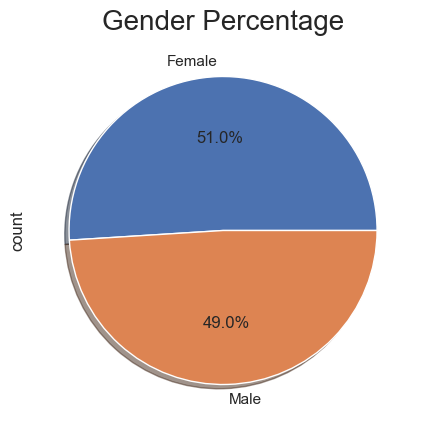

In [8]:
#checking the gender distribution
data.Gender.value_counts().plot.pie(autopct="%1.1f%%", shadow=True, figsize=(5,5))
plt.title("Gender Percentage", fontsize=20);

51% are Female and 49% are male customers.

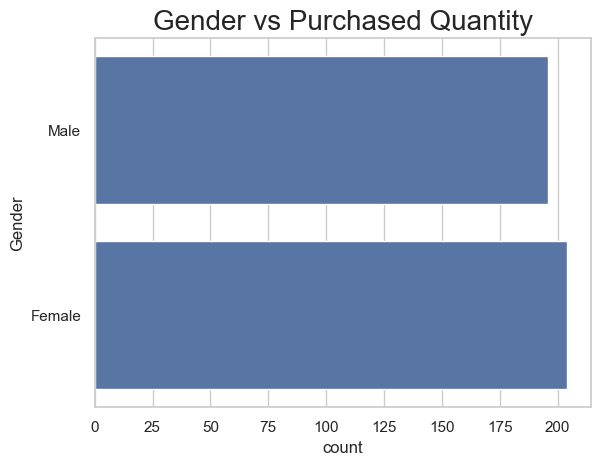

In [9]:
#purchased vs gender
sns.countplot(data.Gender)
plt.title("Gender vs Purchased Quantity", fontsize=20);

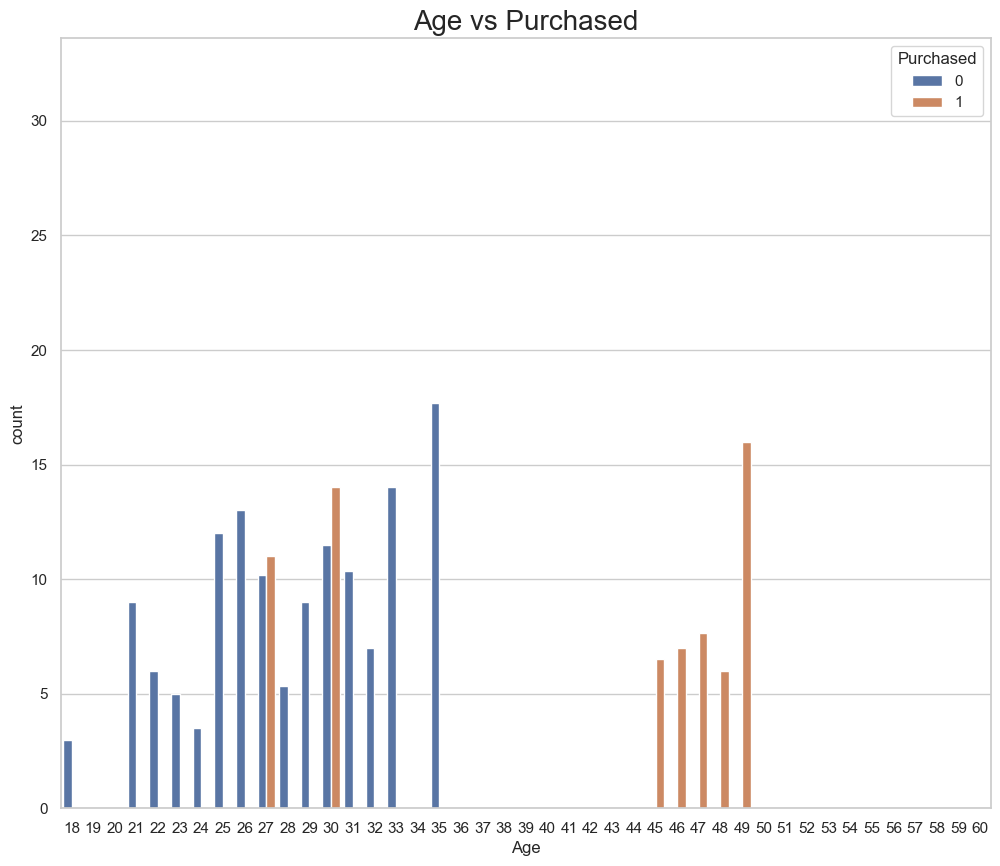

In [10]:
#checking how many user purchased based on the age 
plt.figure(figsize=(12,10))
sns.barplot(y=data.Age.value_counts(),x="Age",data=data, hue="Purchased", err_kws={'linewidth': 0})

plt.title("Age vs Purchased", fontsize=20);

We can see that most of the purchases are in the age group of 45-50.
There are some users in the age of 27 and 30 who made the purchaes. Most non purchasers are in Age 35.

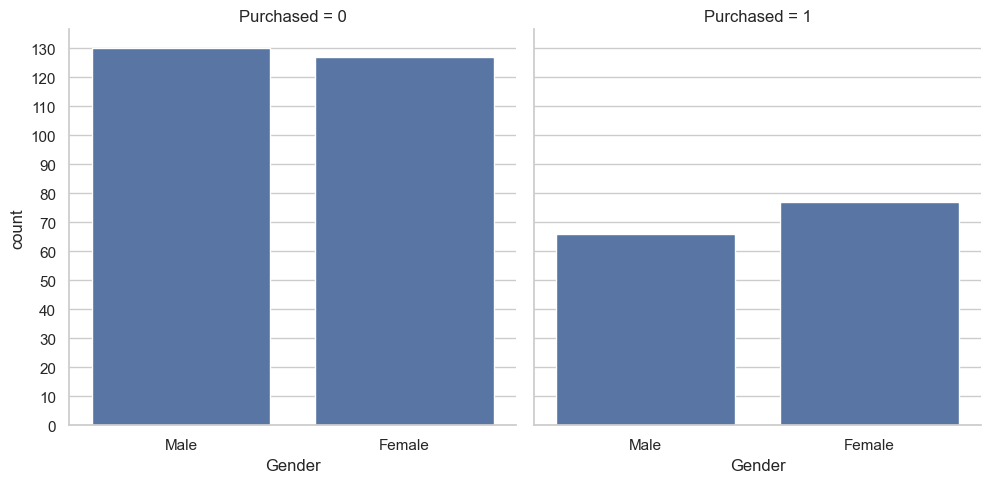

In [11]:
#checking purchase status based on gender
sns.catplot(x="Gender", col="Purchased", data=data, kind='count')
plt.yticks(np.arange(0,140,10));

Most of the purchasers are Female and most of the non purchasers are male.

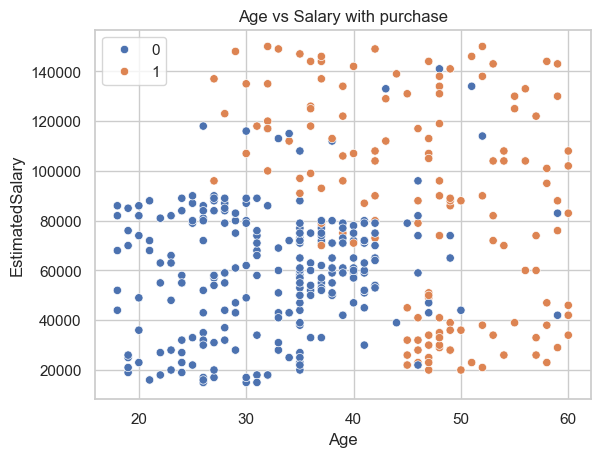

In [12]:
sns.scatterplot(x="Age", y="EstimatedSalary",data=data, hue=data.Purchased)
plt.title("Age vs Salary with purchase")
plt.legend()
plt.show()

In [13]:
#mapping the gender values to 0 and 1
data.Gender = data.Gender.map({"Male":1, "Female":0})
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


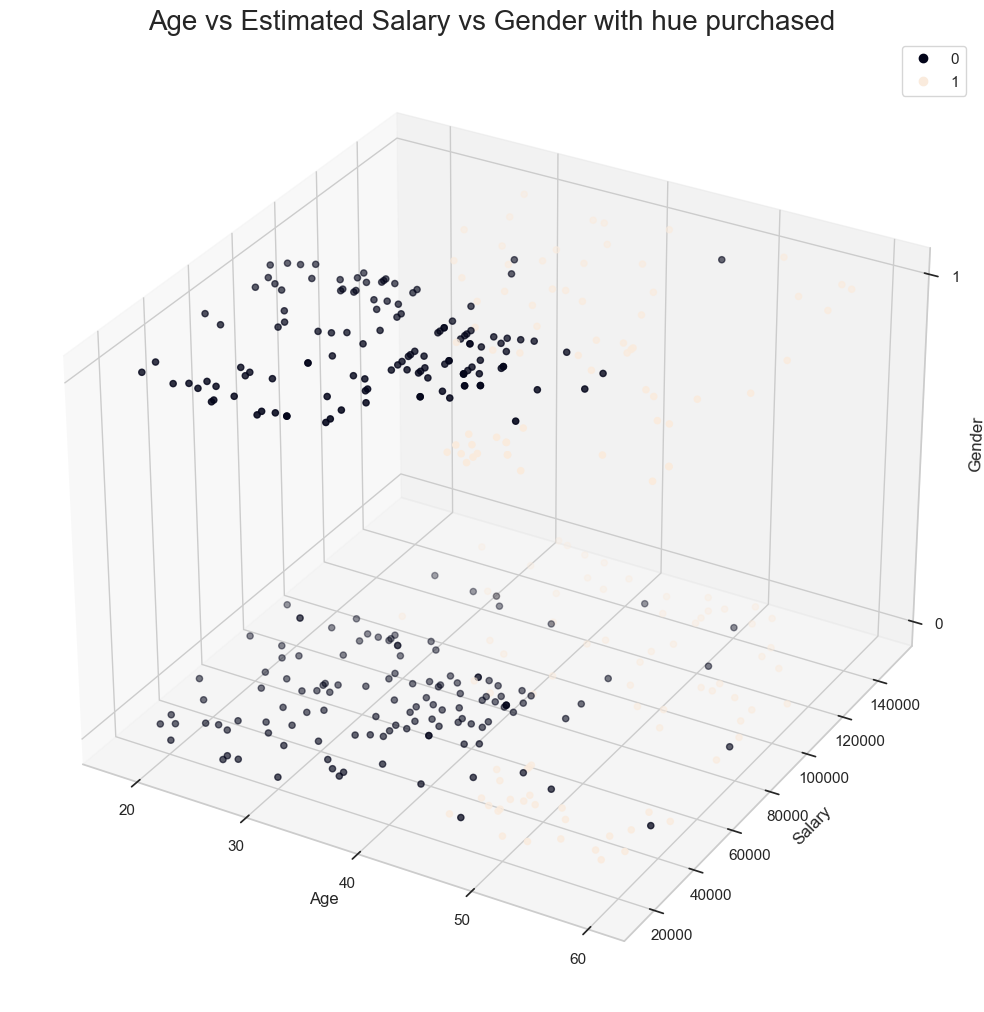

In [14]:
fig = plt.figure(figsize=(10,12))
ax = plt.axes(projection="3d")
sc = ax.scatter3D(data.Age, data.EstimatedSalary, data.Gender, c=data.Purchased)
plt.title("Age vs Estimated Salary vs Gender with hue purchased",fontsize=20)
ax.set_xlabel("Age")
ax.set_ylabel("Salary")
ax.set_zlabel("Gender")
ax.set_zticks([0,1])
plt.legend(*sc.legend_elements())
plt.tight_layout()

### Outlier Detection

In [25]:
#checking for null values
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There are no missing values

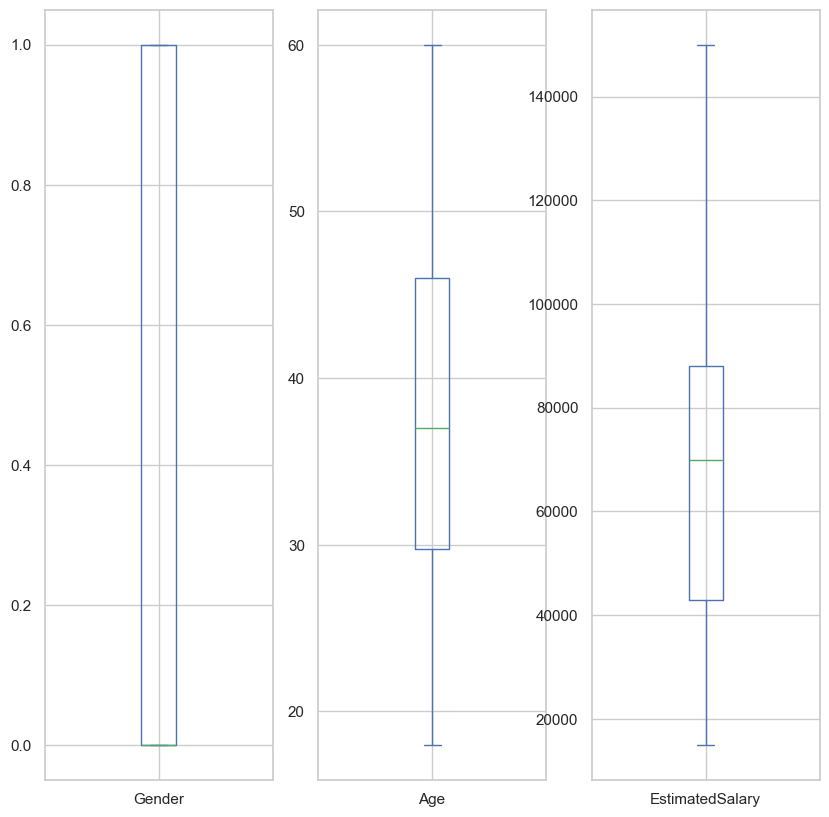

In [26]:
#checking for outliers using boxplot
plt.figure(figsize=(10,10))
for index, column in enumerate(data.drop(['User ID','Purchased'], axis=1).columns):
    plt.subplot(1,3,index+1)
    data[column].plot(kind="box")

plt.show()

There are no outliers in the data

## Modelling

We are trying out classification models to predict the target class which is `Purchased` from the given features `Gender`,`Age`, `EstimatedSalary`. We can drop `User ID` column which is unique for each row in the data.

For modelling we need to 
* Split the dataset into target and features (X and y)
* Split the data into train and test sets
* Try out various classification model's available in sklearn

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('Purchased', axis=1)
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape # Checking the shapes

((340, 4), (60, 4), (340,), (60,))

**Logistic Regression**

Logistic regression is a simple classification model
Let's try logistic regression with default parameters

In [16]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
y_pred


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [17]:
# Let's try scoring the model
lr_model.score(X_test,y_test)

0.9

We have 90% accuracy on the test data

In [18]:
#check train accuracy
lr_model.score(X_train, y_train)

0.8382352941176471

**Support Vector Classifier**

Let's try out support vector classifier

In [19]:
from sklearn.svm import SVC

#training the model with default parameters
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc.score(X_test, y_test)

0.6833333333333333

**RandomForestClassifier**

RandomForest Classifier is one the most powerful classification model. Let's try the model with default parameters.

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)#check test accuracy

0.9166666666666666

In [21]:
#making predictions on the model
y_preds = rf_clf.predict(X_test)

In [22]:
#check the training accuracy
rf_clf.score(X_train, y_train)

1.0

The random forest classifier is good enough for our application.

## Model Evaluation

Let's check some metrics to evaluate our best model (RandomForestClassifier)



In [23]:
#check the classification report of our model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.82      0.95      0.88        19

    accuracy                           0.92        60
   macro avg       0.90      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



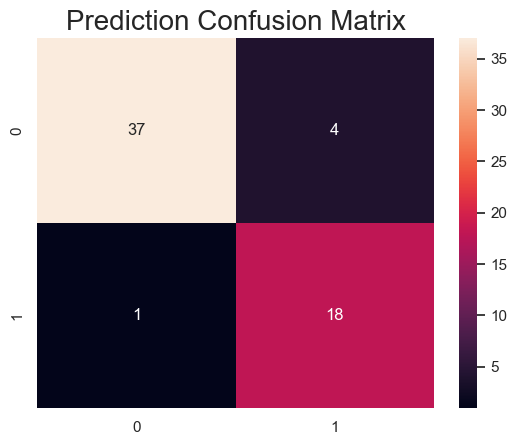

In [24]:
# Let's plot a confusion matrix
from sklearn.metrics import confusion_matrix

#plot the confusion matrix with a heatmap
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.title('Prediction Confusion Matrix', fontsize=20);

Trying scaling the data to check weather there is any impact in the metrics after training our current best model with scaled data.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Creating a pipeline to incorporate scaling along with the model
model = Pipeline([
    ("Standard_Scaler",StandardScaler()),
    ("RandomForestClassifier",RandomForestClassifier())
])

#fitting the model with the data
model.fit(X_train, y_train)

Pipeline(steps=[('Standard_Scaler', StandardScaler()),
                ('RandomForestClassifier', RandomForestClassifier())])

In [32]:
model.score(X_test, y_test)

0.9333333333333333

There is a slight improvement in scaling the data

### Hyper Parameter tuning our random forest classifier

**Randomized Search CV**

In [55]:
from sklearn.model_selection import RandomizedSearchCV


#creating a param grid
param_grid = [{'max_depth': list(range(1, 15)), 
               'max_features': ["sqrt","log2"],
               'criterion' : ["gini", "entropy", "log_loss"],
               'min_samples_split':np.arange(0,10),
               'min_samples_leaf':np.arange(0,10),
               }]

random_search_cv = RandomizedSearchCV(
    RandomForestClassifier(),
    param_grid,
    n_jobs=-1,
    random_state=42
)

random_search_cv.fit(X_train, y_train)

/opt/anaconda3/envs/deeplearning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/deeplearning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/deeplearning/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/deeplearning/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validat

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy',
                                                       'log_loss'],
                                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14],
                                         'max_features': ['sqrt', 'log2'],
                                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}],
                   random_state=42)

In [56]:
random_search_cv.best_score_

0.9117647058823529

In [57]:
random_search_cv.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 4,
 'criterion': 'log_loss'}

**Grid Search CV**

In [59]:
from sklearn.model_selection import GridSearchCV

#using the same param grid
grid_search_cv = GridSearchCV(RandomForestClassifier(),
                              param_grid,
                              n_jobs=-1,
                              )

#fitting the data
grid_search_cv.fit(X_train, y_train)

/opt/anaconda3/envs/deeplearning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
11760 fits failed out of a total of 42000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4200 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/deeplearning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/deeplearning/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/deeplearning/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
   

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14],
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}])

In [60]:
grid_search_cv.best_score_

0.9147058823529411

In [61]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 7}

In [82]:
#creating the model again with best parameters  and scaling
best_model = Pipeline([
    ("Scaler",StandardScaler()),
    ("random_forest_clf",RandomForestClassifier(
        criterion='gini',
        max_depth=3,
        max_features="log2",
        min_samples_leaf=6,
        min_samples_split=7
    ))
])

#fitting the model
best_model.fit(X_train.drop('User ID', axis=1), y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('random_forest_clf',
                 RandomForestClassifier(max_depth=3, max_features='log2',
                                        min_samples_leaf=6,
                                        min_samples_split=7))])

In [83]:
#scoring the best model
best_model.score(X_test.drop('User ID', axis=1), y_test)

0.9333333333333333

### Reevaluating the model

In [84]:
#making predictions
y_preds = best_model.predict(X_test.drop('User ID', axis=1))

In [85]:
#check the classification report of our model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        41
           1       0.83      1.00      0.90        19

    accuracy                           0.93        60
   macro avg       0.91      0.95      0.93        60
weighted avg       0.94      0.93      0.93        60



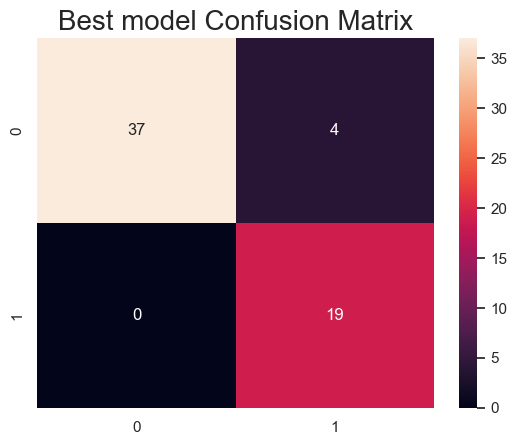

In [86]:
# Let's plot a confusion matrix
from sklearn.metrics import confusion_matrix

#plot the confusion matrix with a heatmap
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.title('Best model Confusion Matrix', fontsize=20);

There is slight improvement in our metrics of evaluation

## Model Deployment

We will be using joblib to save our model. Then using Flask we will deploy our model.

In [87]:
import joblib

joblib.dump(best_model, "best_model.joblib")

['best_model.joblib']

In [89]:
#loading the model and scoring the model again
loaded_model = joblib.load("best_model.joblib") 

loaded_model.score(X_test.drop('User ID', axis=1),y_test)

0.9333333333333333